### Import necessary libraries

In [45]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

### Read Data set 

In [50]:
# Load dataset
df = pd.read_csv("mushroom.csv")

# Preview
df.head()


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [52]:
counts = df['class'].value_counts()
print("Counts using value_counts:")
print(counts)

Counts using value_counts:
class
e    4208
p    3916
Name: count, dtype: int64


### Separate Features

In [55]:
# Features
X = df.drop(["class"], axis=1)

# TTo drop accuracy
# cols_to_drop = ["class", "odor", "gill_size", "gill_color", "spore_print_color", "stalk_surface_above_ring", "habitat", "population"]
# X = df.drop(columns=cols_to_drop)

# Re-run your train_test_split and logreg_pipeline.fit with X_hard
# Target: convert 'e' -> 0, 'p' -> 1
y = df["class"].map({"e": 0, "p": 1})


### Train test split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression 

In [82]:
# Identify all categorical features
categorical_features = X.columns.tolist()

# Preprocessing: One-Hot Encode all categorical columns
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Pipeline: Preprocessing + Logistic Regression
logreg_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train model
logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred = logreg_pipeline.predict(X_test)
y_prob = logreg_pipeline.predict_proba(X_test)[:, 1]


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

# --- 3. PRINT THE RESULTS ---
print(f"Logistic Regression RMSE: {rmse:.4f}")
print(f"Logistic Regression R2 Score: {r2:.4f}")

# Final Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[843   0]
 [  0 782]]
Logistic Regression RMSE: 0.0000
Logistic Regression R2 Score: 1.0000
Final Accuracy: 100.00%


### Logistic regression confusion matrix

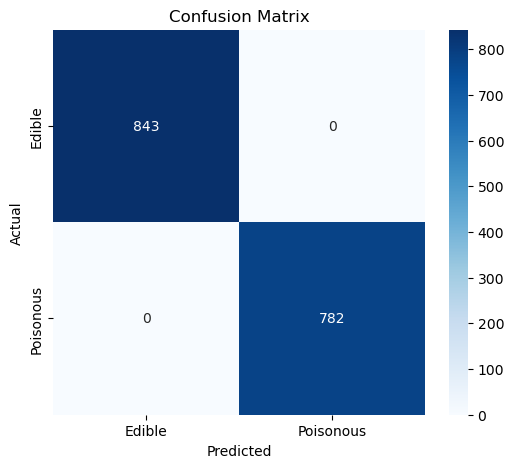

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Logistic regression graph

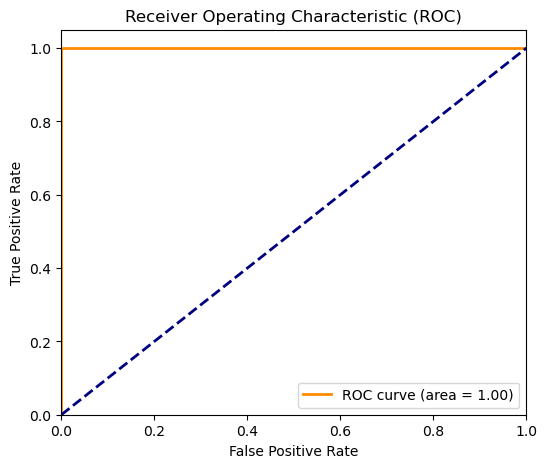

In [73]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ("preprocessing", preprocessor),  # same preprocessing
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Calculate R2 Score
r2_rf = r2_score(y_test, y_pred_rf)

# --- 3. PRINTING RESULTS ---
print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest R2 Score: {r2_rf:.4f}")

# 1. Print the Final Random Forest Accuracy
final_rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Final Accuracy: {final_rf_acc * 100:.2f}%")

Confusion Matrix:
 [[843   0]
 [  0 782]]
Random Forest RMSE: 0.0000
Random Forest R2 Score: 1.0000
Random Forest Final Accuracy: 100.00%


### Random Forest Confusion Matrix

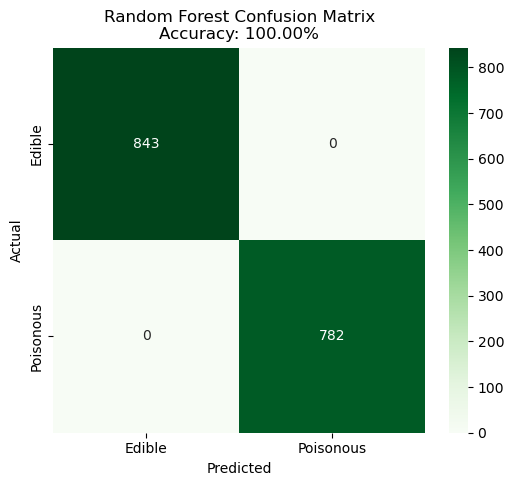

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix Heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Random Forest Confusion Matrix\nAccuracy: {final_rf_acc*100:.2f}%')
plt.show()

### Random Forest top important Features

C:\Users\User\AppData\Local\Temp\ipykernel_2492\628467487.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='Greens_r')


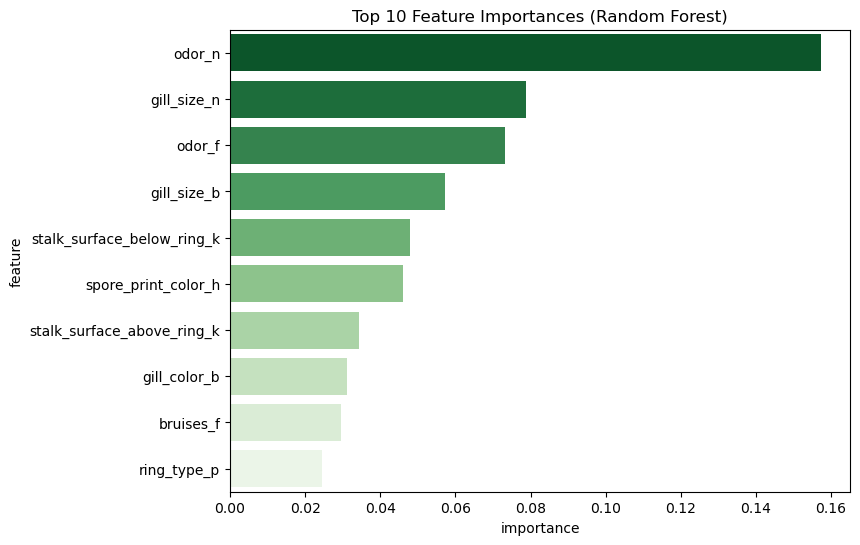

In [196]:
#Top 10 Feature Importances

feature_names = rf_pipeline.named_steps['preprocessing']\
                .named_transformers_['cat'].get_feature_names_out()
importances = rf_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='Greens_r')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

## Random forest with dropped accuracy 
### Since the dataset is too clean we add and use only specific columns to verify the cause of occurance of 100 percent accuracy 

In [234]:
# # 1. Drop every physical trait (color, shape, rings, gills, odor, etc.)
# # We keep only 'habitat' and 'population'
# X_broken = df[['habitat', 'population', 'gill_size', 'gill_color']]
# y = df["class"].map({"e": 0, "p": 1})

# # 2. Preprocessing for the remaining 2 columns
# categorical_broken = X_broken.columns.tolist()
# preprocessor_broken = ColumnTransformer([
#     ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_broken)
# ])

# # 3. Pipeline & Training
# rf_broken = Pipeline([
#     ("preprocessing", preprocessor_broken),
#     ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
# ])

# X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_broken, y, test_size=0.2, random_state=42)
# rf_broken.fit(X_train_b, y_train_b)

# # 4. Final Results
# y_pred_b = rf_broken.predict(X_test_b)
# accuracy = accuracy_score(y_test_b, y_pred_b)

# print(f"Random Forest 'Broken' Accuracy: {accuracy * 100:.2f}%")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test_b, y_pred_b))

# ANN (Deep Learning)

In [80]:
# 1. Encode the FULL X first to get consistent columns (117 features)
X_encoded_all = pd.get_dummies(X)

# 2. Now split the already-encoded data
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_encoded_all, y, test_size=0.2, random_state=42
)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ann)
X_test_scaled = scaler.transform(X_test_ann)

# 4. Build ANN (input_shape will now be 117)
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train
ann.fit(X_train_scaled, y_train_ann, epochs=20, batch_size=32, validation_split=0.1)

# --- 1. EVALUATE ANN ---
loss, ann_accuracy = ann.evaluate(X_test_scaled, y_test_ann, verbose=0)

# Get raw predictions (probabilities)
y_pred_ann_prob = ann.predict(X_test_scaled, verbose=0)
# Convert probabilities to hard classes (0 or 1)
y_pred_ann_class = (y_pred_ann_prob > 0.5).astype(int)

# --- 2. CALCULATION OF RMSE AND R2 ---
mse_ann = mean_squared_error(y_test_ann, y_pred_ann_class)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_test_ann, y_pred_ann_class)

# --- 3. PRINTING RESULTS ---
print(f"ANN Test Accuracy: {ann_accuracy:.4f}")
print(f"ANN RMSE: {rmse_ann:.4f}")
print(f"ANN R2 Score: {r2_ann:.4f}")
print(f"\nFINAL ANN TEST ACCURACY: {ann_accuracy * 100:.2f}%")

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1152 - val_accuracy: 0.9969 - val_loss: 0.0119
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 0.0033 - val_accuracy: 0.9969 - val_loss: 0.0052
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9985 - val_loss: 0.0028
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.0805e-04 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.9451e-04 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.8167e-04 - val_accuracy: 1.0000 - val_loss: 9.3657e-04
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.2523e-04 - val_accuracy: 1.0000 - val_loss: 7.9385e-04
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9

In [271]:
history = ann.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.3047e-06 - val_accuracy: 1.0000 - val_loss: 5.0299e-04
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.4862e-06 - val_accuracy: 1.0000 - val_loss: 4.6460e-04
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.7895e-06 - val_accuracy: 1.0000 - val_loss: 4.4064e-04
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 4.2092e-06 - val_accuracy: 1.0000 - val_loss: 4.2200e-04
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.7120e-06 - val_accuracy: 1.0000 - val_loss: 3.8256e-04
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.2718e-06 - val_accuracy: 1.0000 - val_loss: 3.8727e-04
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.8819e-06 - val_accuracy: 1.0000 - val_loss: 3.2745e-04
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

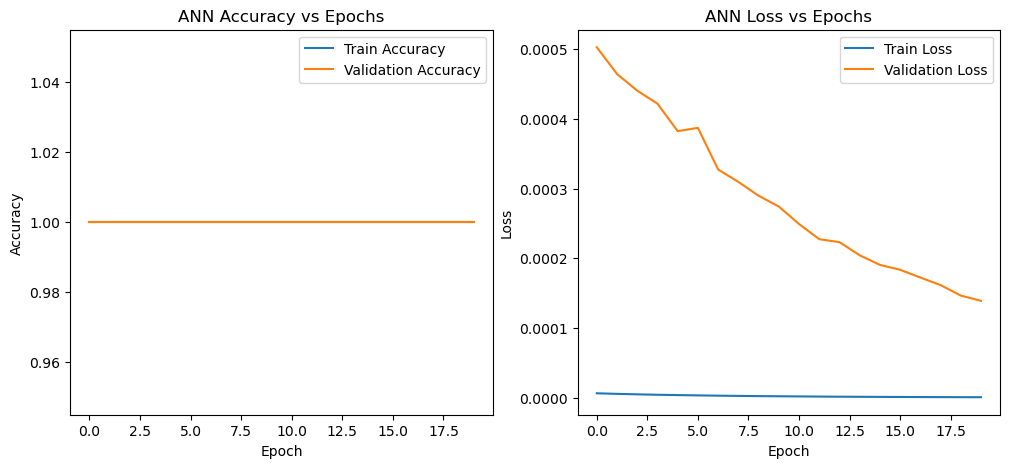

In [272]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ANN Accuracy vs Epochs')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN Loss vs Epochs')
plt.legend()

plt.show()


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


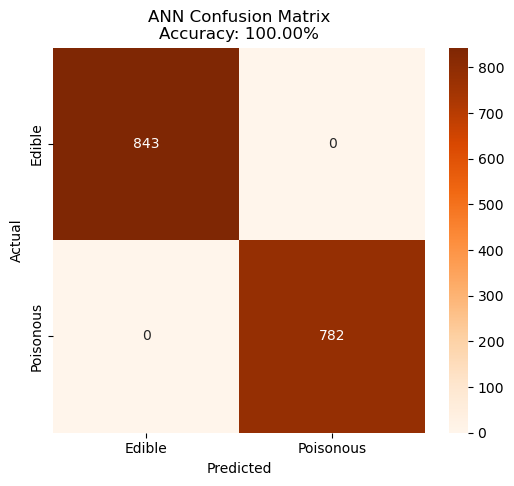

In [273]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict probabilities
y_pred_prob = ann.predict(X_test_scaled).ravel()

# Convert probabilities to class labels
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Oranges',
    xticklabels=['Edible', 'Poisonous'],
    yticklabels=['Edible', 'Poisonous']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'ANN Confusion Matrix\nAccuracy: {accuracy*100:.2f}%')
plt.show()


## ANN Deep learning with dropped accuracy 
### Since the dataset is too clean we add and use only specific columns to verify the cause of occurance of 100 percent accuracy 

In [279]:
# # 1. Select only the weakest features
# cols_to_keep = ["stalk_shape", "gill_size", "gill_color", "spore_print_color", "stalk_surface_above_ring", "habitat", "population"]
# X_weak = df[cols_to_keep]
# y = df["class"].map({"e": 0, "p": 1})

# # 2. Re-encode and Scale (Crucial for ANN)
# X_weak_encoded = pd.get_dummies(X_weak)
# X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_weak_encoded, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_w)
# X_test_scaled = scaler.transform(X_test_w)

# # 3. Re-build the same ANN architecture
# ann_weak = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# ann_weak.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # 4. Train (Fewer epochs are fine since it will struggle to learn more)
# ann_weak.fit(X_train_scaled, y_train_w, epochs=10, batch_size=32, verbose=0)

# # 5. Final Evaluation
# loss, final_accuracy = ann_weak.evaluate(X_test_scaled, y_test_w)
# print(f"\nNEW ANN ACCURACY: {final_accuracy * 100:.2f}%")

# # 6. Accuracy Drop Calculation
# drop = 1.0 - final_accuracy
# print(f"Total Accuracy Drop: {drop * 100:.2f}%")

# Testing with data 

In [299]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Clear any old models from memory
tf.keras.backend.clear_session()

# 2. Use the 117-feature encoded data
X_encoded_all = pd.get_dummies(X) 
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(
    X_encoded_all, y, test_size=0.2, random_state=42
)

# 3. Scale based on the 117 columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ann)
X_test_scaled = scaler.transform(X_test_ann)

# 4. Define the NEW model with the correct input shape (117)
ann = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)), # This will be 117
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train (Few epochs just to get it working)
ann.fit(X_train_scaled, y_train_ann, epochs=10, batch_size=32, verbose=0)

print(f"Model re-trained. Input shape is now: {ann.input_shape}")

Model re-trained. Input shape is now: (None, 117)


In [304]:
def compare_models(index):
    # Get raw data
    sample_features = X.iloc[[index]]
    actual_class = "Poisonous" if y.iloc[index] == 1 else "Edible"
    
    # 1. Pipeline Predictions (LR & RF)
    lr_pred = logreg_pipeline.predict(sample_features)[0]
    rf_pred = rf_pipeline.predict(sample_features)[0]

    # 2. ANN Prediction (The 117-feature path)
    # This aligns the single row to the 117-column master template
    sample_encoded = pd.get_dummies(sample_features).reindex(columns=X_encoded_all.columns, fill_value=0)
    
    # Scale (using .values to avoid the name warning)
    sample_scaled = scaler.transform(sample_encoded.values)
    
    # Predict
    ann_prob = ann.predict(sample_scaled, verbose=0)[0][0]
    ann_label = "Poisonous" if ann_prob > 0.5 else "Edible"

    # Display results
    print(f"--- Result for Index {index} ---")
    print(f"Actual: {actual_class}")
    print(f"{'Logistic Regression:':<25} {'Poisonous' if lr_pred == 1 else 'Edible'}")
    print(f"{'Random Forest:':<25} {'Poisonous' if rf_pred == 1 else 'Edible'}")
    print(f"{'ANN:':<25} {ann_label} (Prob: {ann_prob:.4f})")
    print("-" * 40)

# Test it now
compare_models(3)

--- Result for Index 3 ---
Actual: Poisonous
Logistic Regression:      Poisonous
Random Forest:            Poisonous
ANN:                      Poisonous (Prob: 1.0000)
----------------------------------------


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
